###### 'Recency' (Yenilik): Müşterinin son satın alma tarihinden snapshot tarihine kadar geçen gün sayısını hesaplar. Bu, müşterinin ne kadar "taze" olduğunu gösterir.
###### 'Frequency' (Sıklık): Müşterinin toplam satın alma sayısını hesaplar. Bu, müşterinin ne sıklıkta satın aldığını gösterir.
###### 'Monetary' (Parasal): Müşterinin toplam harcama tutarını hesaplar. Bu, müşterinin ne kadar para harcadığını gösterir.

In [1]:
import pandas as pd

# Veri setini yükleme
data = pd.read_csv('e-comerce.csv',  encoding='unicode_escape')

import warnings
warnings.filterwarnings('ignore')

In [3]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [3]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [11]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [5]:
data = data.dropna()

In [6]:
data.shape

(406829, 8)

In [7]:
data["InvoiceDate"] = pd.to_datetime(data["InvoiceDate"])

In [8]:
data["ToplamHarcama"] = data["Quantity"] * data["UnitPrice"]

In [22]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,ToplamHarcama
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   InvoiceNo      406829 non-null  object        
 1   StockCode      406829 non-null  object        
 2   Description    406829 non-null  object        
 3   Quantity       406829 non-null  int64         
 4   InvoiceDate    406829 non-null  datetime64[ns]
 5   UnitPrice      406829 non-null  float64       
 6   CustomerID     406829 non-null  float64       
 7   Country        406829 non-null  object        
 8   ToplamHarcama  406829 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 31.0+ MB


In [9]:
import datetime as dt

snapshot_date = max(data.InvoiceDate) + dt.timedelta(days=1)

# RFM metriklerini hesaplama
rfm = data.groupby(['CustomerID']).agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days, # müşterinin son satın alma tarihinden snapshot tarihine kadar geçen gün sayısını hesaplar. 
    'InvoiceNo': 'count', # müşterinin toplam satın alma sayısını
    'ToplamHarcama': 'sum' #ne kadar para
})

In [10]:
# Sütun adlarını değiştirme
rfm.rename(columns={'InvoiceDate': 'Recency(Tezelik)',
                    'InvoiceNo': 'Frequency(Sıklık)',
                    'ToplamHarcama': 'MonetaryValue(Parasal)'}, inplace=True)

In [11]:
rfm

,Recency(Tezelik),Frequency(Sıklık),MonetaryValue(Parasal)
CustomerID,,,
12346.0,326,2,0.00
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40
...,...,...,...
18280.0,278,10,180.60
18281.0,181,7,80.82
18282.0,8,13,176.60


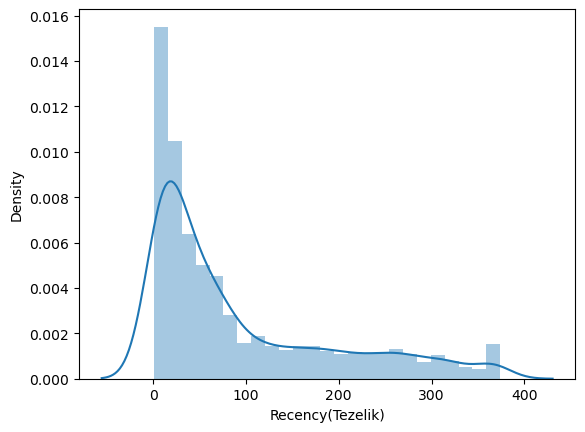

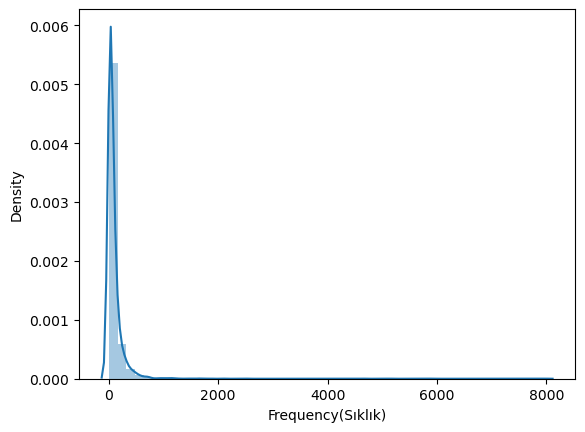

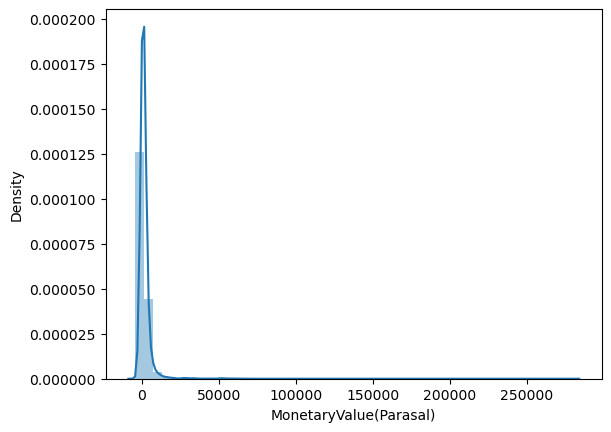

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Recency dağılımı
sns.distplot(rfm['Recency(Tezelik)'])
plt.show()

# Frequency dağılımı
sns.distplot(rfm['Frequency(Sıklık)'])
plt.show()

# MonetaryValue dağılımı
sns.distplot(rfm['MonetaryValue(Parasal)'])
plt.show()

In [13]:
rfm

,Recency(Tezelik),Frequency(Sıklık),MonetaryValue(Parasal)
CustomerID,,,
12346.0,326,2,0.00
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40
...,...,...,...
18280.0,278,10,180.60
18281.0,181,7,80.82
18282.0,8,13,176.60


In [14]:
# qcut 
data_1 = {'Value': [10, 20, 30, 40, 50, 60, 70, 80]}
df_ornek = pd.DataFrame(data_1)

# 'Value' sütununu 4 eşit büyüklükte bölüme ayırma
df_ornek['Quartile'] = pd.qcut(df_ornek['Value'], 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])


In [15]:
df_ornek

,Value,Quartile
0,10,Q1
1,20,Q1
2,30,Q2
3,40,Q2
4,50,Q3
5,60,Q3
6,70,Q4
7,80,Q4


In [16]:
# Sütun adlarını değiştirme
rfm.columns = ['Recency(Tezelik)', 'Frequency(Sıklık)', 'MonetaryValue(Parasal)']

# RFM skorlarını hesaplama
rfm['R_Score'] = pd.qcut(rfm['Recency(Tezelik)'], 5, labels=[5, 4, 3, 2, 1])
rfm['F_Score'] = pd.qcut(rfm['Frequency(Sıklık)'], 5, labels=[1, 2, 3, 4, 5])
rfm['M_Score'] = pd.qcut(rfm['MonetaryValue(Parasal)'], 5, labels=[1, 2, 3, 4, 5])


In [17]:
rfm

,Recency(Tezelik),Frequency(Sıklık),MonetaryValue(Parasal),R_Score,F_Score,M_Score
CustomerID,,,,,,
12346.0,326,2,0.00,1,1,1
12347.0,2,182,4310.00,5,5,5
12348.0,75,31,1797.24,2,3,4
12349.0,19,73,1757.55,4,4,4
12350.0,310,17,334.40,1,2,2
...,...,...,...,...,...,...
18280.0,278,10,180.60,1,1,1
18281.0,181,7,80.82,1,1,1
18282.0,8,13,176.60,5,1,1


In [41]:
# RFM skorlarını birleştirme ve RFM Segmentini oluşturma
rfm['RFM_Segment'] = rfm.apply(lambda x: str(x['R_Score']) + str(x['F_Score']) + str(x['M_Score']), axis=1) # yan yana yazar
rfm['RFM_Score'] = rfm[['R_Score', 'F_Score', 'M_Score']].sum(axis=1) #toplar

In [42]:
rfm

,Recency(Tezelik),Frequency(Sıklık),MonetaryValue(Parasal),R_Score,F_Score,M_Score,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12346.0,326,2,0.00,1,1,1,1.01.01.0,3
12347.0,2,182,4310.00,5,5,5,5.05.05.0,15
12348.0,75,31,1797.24,2,3,4,2.03.04.0,9
12349.0,19,73,1757.55,4,4,4,4.04.04.0,12
12350.0,310,17,334.40,1,2,2,1.02.02.0,5
...,...,...,...,...,...,...,...,...
18280.0,278,10,180.60,1,1,1,1.01.01.0,3
18281.0,181,7,80.82,1,1,1,1.01.01.0,3
18282.0,8,13,176.60,5,1,1,5.01.01.0,7


In [18]:
# RFM skorlarına göre müşteri segmentlerini tanımlama
segt_map = {
    r'[1-2][1-2]': 'Uyuyanlar',              # Hibernating
    r'[1-2][3-4]': 'Risk Altında',           # At Risk
    r'[1-2]5': 'Kaybedemeyiz',               # Can’t Lose
    r'3[1-2]': 'Uykuya Dalma Noktasında',    # About To Sleep
    r'33': 'Dikkat Gerektirenler',           # Need Attention
    r'[3-4][4-5]': 'Sadık Müşteriler',       # Loyal Customers
    r'41': 'Umut Verenler',                  # Promising
    r'51': 'Yeni Müşteriler',                # New Customers
    r'[4-5][2-3]': 'Potansiyel Sadıklar',    # Potential Loyalists
    r'5[4-5]': 'Şampiyonlar'                 # Champions
}
rfm['Segment'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str)
rfm['Segment'] = rfm['Segment'].replace(segt_map, regex=True)

In [19]:
rfm

,Recency(Tezelik),Frequency(Sıklık),MonetaryValue(Parasal),R_Score,F_Score,M_Score,Segment
CustomerID,,,,,,,
12346.0,326,2,0.00,1,1,1,Uyuyanlar
12347.0,2,182,4310.00,5,5,5,Şampiyonlar
12348.0,75,31,1797.24,2,3,4,Risk Altında
12349.0,19,73,1757.55,4,4,4,Sadık Müşteriler
12350.0,310,17,334.40,1,2,2,Uyuyanlar
...,...,...,...,...,...,...,...
18280.0,278,10,180.60,1,1,1,Uyuyanlar
18281.0,181,7,80.82,1,1,1,Uyuyanlar
18282.0,8,13,176.60,5,1,1,Yeni Müşteriler


In [20]:
rfm['Segment'].value_counts()

Segment
Uyuyanlar                  1070
Sadık Müşteriler            839
Şampiyonlar                 604
Risk Altında                583
Potansiyel Sadıklar         504
Uykuya Dalma Noktasında     321
Dikkat Gerektirenler        202
Umut Verenler               107
Kaybedemeyiz                 82
Yeni Müşteriler              60
Name: count, dtype: int64

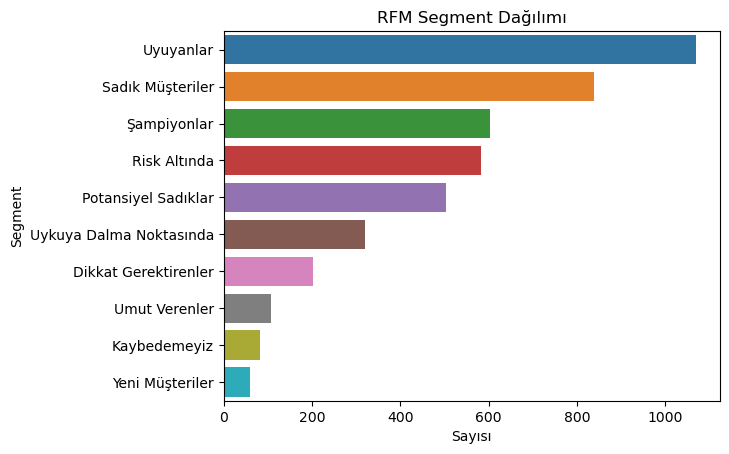

In [45]:
# Segment sayılarını görselleştirme
sns.countplot(y='Segment', data=rfm, order = rfm['Segment'].value_counts().index)
plt.title('RFM Segment Dağılımı')
plt.xlabel('Sayısı')
plt.ylabel('Segment')
plt.show()

In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Verileri ölçeklendirme
scaler = StandardScaler()
rfm_numeric = rfm[['Recency(Tezelik)', 'Frequency(Sıklık)', 'MonetaryValue(Parasal)', 'R_Score', 'F_Score', 'M_Score', 'RFM_Score']]

rfm_scaled = scaler.fit_transform(rfm_numeric) # ölçeklendirir

In [49]:
rfm_numeric

,Recency(Tezelik),Frequency(Sıklık),MonetaryValue(Parasal),R_Score,F_Score,M_Score,RFM_Score
CustomerID,,,,,,,
12346.0,326,2,0.00,1,1,1,3
12347.0,2,182,4310.00,5,5,5,15
12348.0,75,31,1797.24,2,3,4,9
12349.0,19,73,1757.55,4,4,4,12
12350.0,310,17,334.40,1,2,2,5
...,...,...,...,...,...,...,...
18280.0,278,10,180.60,1,1,1,3
18281.0,181,7,80.82,1,1,1,3
18282.0,8,13,176.60,5,1,1,7


In [50]:
rfm_scaled

array([[ 2.32202285e+00, -3.91719701e-01, -2.31000989e-01, ...,
        -1.39329872e+00, -1.41389020e+00, -1.66688536e+00],
       [-8.93733232e-01,  3.82656967e-01,  2.93431666e-01, ...,
         1.41449202e+00,  1.41389020e+00,  1.66942906e+00],
       [-1.69195597e-01, -2.66959016e-01, -1.23162220e-02, ...,
         1.05966485e-02,  7.06945101e-01,  1.27184905e-03],
       ...,
       [-8.34182193e-01, -3.44396683e-01, -2.09512634e-01, ...,
        -1.39329872e+00, -1.41389020e+00, -5.54780556e-01],
       [-8.73882885e-01,  2.85205812e+00,  2.39000508e-02, ...,
         1.41449202e+00,  1.41389020e+00,  1.66942906e+00],
       [-4.86801135e-01, -9.91774042e-02, -7.44423043e-03, ...,
         7.12544334e-01,  7.06945101e-01,  5.57324254e-01]])

In [21]:
# K-means kümeleme
kmeans = KMeans(n_clusters=4, random_state=1)

NameError: name 'KMeans' is not defined

In [ ]:
rfm_numeric['Cluster'] = kmeans.fit_predict(rfm_scaled)

In [ ]:
rfm_numeric

In [55]:
sse

{1: 30603.999999999996,
 2: 18336.633914390237,
 3: 14319.189429677004,
 4: 10907.754952500312,
 5: 9408.026846682482,
 6: 7973.659882355146,
 7: 6936.665565361045,
 8: 6155.639987758383,
 9: 5558.553848412796,
 10: 5151.682330162972}

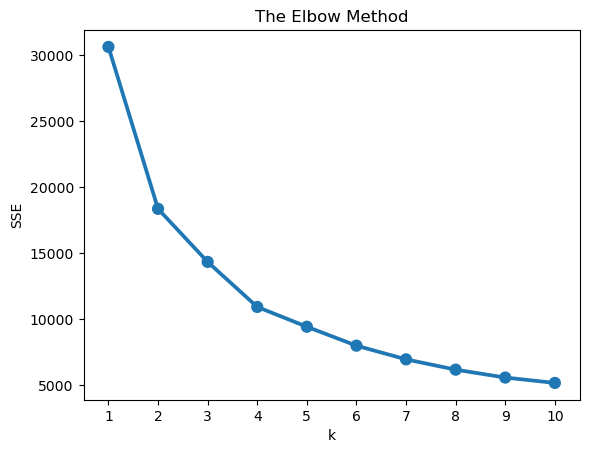

In [56]:
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

# V. Pratik Uygulamalar <a class="anchor" id="pratik-uygulamalar"></a>


## İş Kararlarına Etkisi

RFM (Recency, Frequency, Monetary) analizi, müşteri ilişkileri yönetimi ve pazarlama stratejileri için güçlü bir araçtır. İşletmeler, RFM analizini kullanarak müşteri tabanlarını daha iyi anlayabilir ve daha etkili kararlar alabilirler.

### Stok Yönetimi

RFM analizi, müşterilerin satın alma sıklığını ve en son satın alma zamanını göz önünde bulundurarak stok seviyelerini optimize etmek için kullanılabilir. Örneğin:

- **Yüksek Frekans ve Düşük Recency**: Bu müşteriler için popüler ürünlerin stok seviyeleri yüksek tutulmalıdır.
- **Düşük Frekans ve Yüksek Recency**: Nadiren satın alan müşteriler için stok seviyeleri düşük tutularak maliyetler azaltılabilir.

### Fiyatlandırma Stratejileri

Müşterilerin parasal değerine göre dinamik fiyatlandırma stratejileri geliştirilebilir:

- **Yüksek Monetary Değer**: Premium müşterilere özel fiyatlandırma ve indirimler sunulabilir.
- **Düşük Monetary Değer**: Bu müşterileri daha fazla satın alma yapmaya teşvik etmek için promosyonlar düzenlenebilir.

### Müşteri Hizmetleri

RFM segmentasyonu, müşteri hizmetleri kaynaklarının daha etkin kullanılmasını sağlar:

- **Yüksek Frekans ve Monetary Değer**: VIP müşteri hizmetleri bu grup için öncelikli olabilir.
- **Düşük Frekans ve Recency**: Otomatik hizmetler veya self-servis seçenekleri bu grup için daha uygun olabilir.

## Müşteri Yaşam Döngüsü Yönetimi ve Müşteri Sadakati Programları

RFM analizi, müşteri yaşam döngüsünün çeşitli aşamalarında müşterilere nasıl yaklaşılacağını belirlemede yardımcı olur:

- **Yeni Müşteriler (High Recency)**: Hoş geldiniz teklifleri ve ilk satın alma indirimleri sunulabilir.
- **Sadık Müşteriler (High Frequency, High Monetary)**: Sadakat programları ve özel tekliflerle bu müşteriler ödüllendirilebilir.
- **Uykuda Olan Müşteriler (Low Frequency)**: Yeniden etkinleştirme kampanyaları ile bu müşteriler geri kazanılabilir.

## Endüstri Başarı Hikayeleri

RFM analizinin başarıyla uygulandığı birkaç örnek:

- **Perakende**: Bir perakende zinciri, RFM analizini kullanarak müşteri satın alma davranışlarını anladı ve hedeflenmiş pazarlama kampanyaları ile satışlarını %20 artırdı.
- **E-Ticaret**: Bir e-ticaret platformu, RFM modelini kullanarak müşteri segmentasyonu yaptı ve en değerli müşterilere özel teklifler sunarak müşteri sadakatini artırdı.
- **Finansal Hizmetler**: Bir banka, RFM analizini kullanarak müşteri etkileşimlerini iyileştirdi ve çapraz satış oranlarını %15 yükseltti.
